In [73]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

In [74]:
from scipy.cluster.vq import kmeans
from operator import itemgetter


def new_labels(points, centers):
    distance = np.hstack([np.linalg.norm(points - center, axis=1).reshape(-1, 1) for center in centers])
    return np.argmin(distance, axis=1)


def prediction(k):
    centers, score = kmeans(flattened_images, k)
    labels = new_labels(flattened_images, centers)
    
    digit_cluster = []
    for i in range(k):
        digit_cluster.append(np.argmax(np.bincount(digits.target[labels == i])))
    
    my_prediction = np.array(list(map(digit_cluster.__getitem__, labels)))
    return my_prediction, centers, digit_cluster

def draw_matrix(true, my_prediction):
    types = max(true.max(), my_prediction.max()) + 1
    matrix =  np.array([[np.count_nonzero((true == i) & (my_prediction == j)) for j in range(types)] \
                            for i in range(types)])
    plt.matshow(matrix)
    plt.xticks(range(types))
    plt.yticks(range(types))
    plt.title('Confusion matrix ')
    plt.ylabel('Настоящее значение')
    plt.xlabel('Предсказанное значение')
    plt.show()
    
def mistake(true, my_prediction):
    return np.count_nonzero(true != my_prediction) / true.size

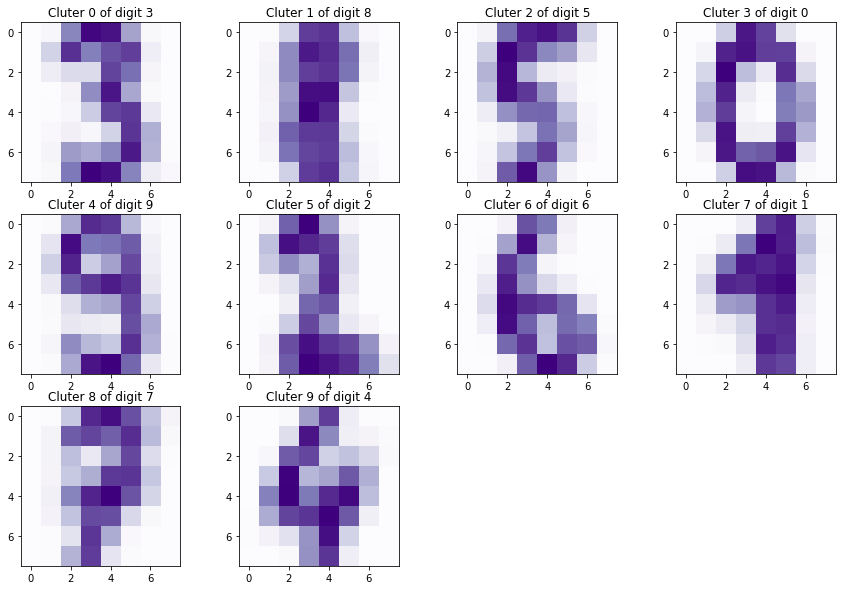

In [86]:
from sklearn.preprocessing import scale
from scipy.cluster.vq import kmeans

flattened_images = digits.images.reshape((digits.images.shape[0], -1))
my_prediction, centers, digit_cluster = prediction(10)

plt.figure(figsize=(15,10))
for i in range(10):
    plt.subplot(3, 4, i + 1)
    plt.title('Cluter {} of digit {}'.format(i, digit_cluster[i]))
    plt.imshow(centers[i].reshape((8, 8)), cmap='Purples')

In [87]:
print('Final mistake', mistake(digits.target, my_prediction))

for i in range(10):
    maska_dlya_i = (digits.target == i)
    print('Digit', i, 'mistake', mistake(digits.target[maska_dlya_i], my_prediction[maska_dlya_i]))

Final mistake 0.20701168614357263
Digit 0 mistake 0.0056179775280898875
Digit 1 mistake 0.6978021978021978
Digit 2 mistake 0.1638418079096045
Digit 3 mistake 0.15300546448087432
Digit 4 mistake 0.09944751381215469
Digit 5 mistake 0.25274725274725274
Digit 6 mistake 0.022099447513812154
Digit 7 mistake 0.0223463687150838
Digit 8 mistake 0.42528735632183906
Digit 9 mistake 0.22777777777777777


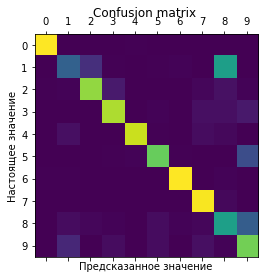

In [88]:
draw_matrix(digits.target, my_prediction)

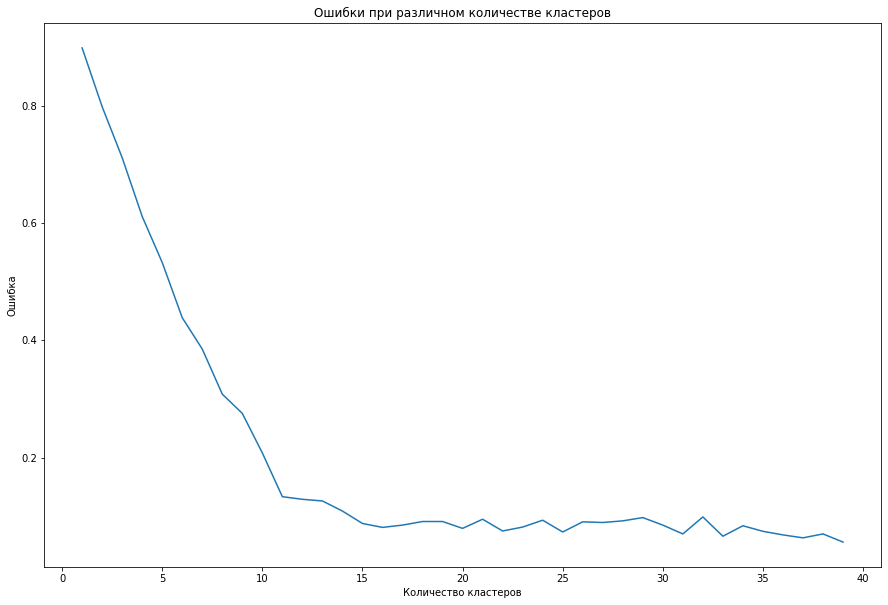

In [89]:
range_of_k = range(1, 40)
mistakes = [mistake(digits.target, prediction(k)[0]) for k in range_of_k]

plt.figure(figsize=(15,10))
plt.title('Ошибки при различном количестве кластеров')
plt.xlabel('Количество кластеров')
plt.ylabel('Ошибка')
plt.plot(range_of_k, mistakes)

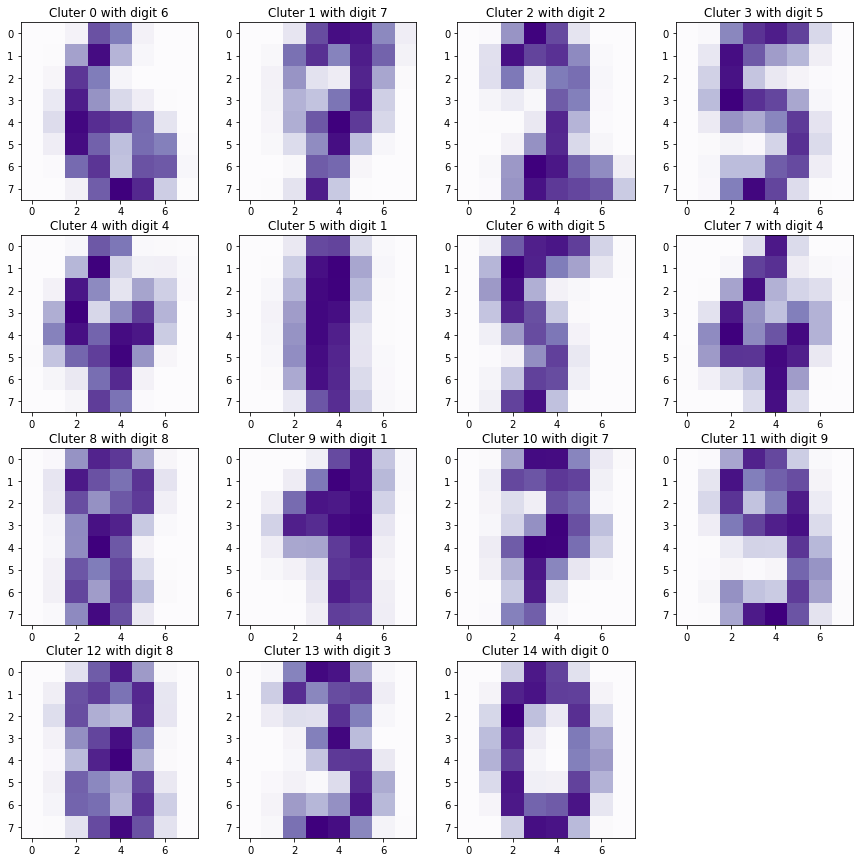

In [90]:
my_prediction, centers, digit_cluster = prediction(16)

plt.figure(figsize=(15,15))
for i in range(15):
    plt.subplot(4, 4, i + 1)
    plt.title('Cluter {} with digit {}'.format(i, digit_cluster[i]))
    plt.imshow(centers[i].reshape((8, 8)), cmap='Purples')
 

#Из графика понятно, что стоит делать больше 10 кластеров, так как на 10 кластерах ошибка всё ещё большая.
#Во второй попытке я взял уже 15 кластеров и результаты стали гораздо лучше. При увеличении количества кластеров ошибка будет
#становиться всё меньше. По матрице для случая 15 кластеров (см. ниже) понятно, что теперь все числа 
#определяются плюс-минус правильно, в отличие от случая с 10 кластерами, когда это можно было сказать только про 3 числа.



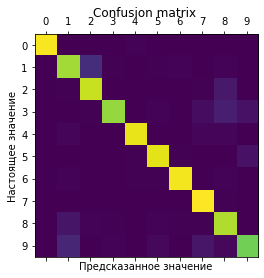

In [91]:
draw_matrix(digits.target, my_prediction)